# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pp
from scipy.stats import linregress

# Date is in timestamp, we convert to datetime
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [5]:
print(weather_api_key)

f291c90ad84559e4d06c863cbf68ef10


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = round(city_weather["main"]["temp_max"] - 273.15,2)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | copainala
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | kataragama
City not found. Skipping...
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | caleta de carquin
Processing Record 15 of Set 1 | howrah
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | oodweyne
Processing Record 20 of Set 1 | santa elena de uairen
Processing Record 21 of 

In [8]:
#Display full data retrieval results
pp.pprint(city_data)

[{'City': 'copainala',
  'Cloudiness': 95,
  'Country': 'MX',
  'Date': datetime.datetime(2023, 11, 30, 3, 29, 49),
  'Humidity': 99,
  'Lat': 17.0833,
  'Lng': -93.2,
  'Max Temp': 20.43,
  'Wind Speed': 1.09},
 {'City': 'port-aux-francais',
  'Cloudiness': 100,
  'Country': 'TF',
  'Date': datetime.datetime(2023, 11, 30, 3, 29, 50),
  'Humidity': 97,
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 2.2,
  'Wind Speed': 21.56},
 {'City': 'waitangi',
  'Cloudiness': 21,
  'Country': 'NZ',
  'Date': datetime.datetime(2023, 11, 30, 3, 29, 50),
  'Humidity': 74,
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 12.68,
  'Wind Speed': 4.02},
 {'City': 'yellowknife',
  'Cloudiness': 40,
  'Country': 'CA',
  'Date': datetime.datetime(2023, 11, 30, 3, 26, 25),
  'Humidity': 95,
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': -17.55,
  'Wind Speed': 2.57},
 {'City': 'blackmans bay',
  'Cloudiness': 100,
  'Country': 'AU',
  'Date': datetime.datetime(2023, 11, 30, 3, 29, 50),
  'Humidity'

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,copainala,17.0833,-93.2000,20.43,99,95,1.09,MX,2023-11-30 03:29:49
1,port-aux-francais,-49.3500,70.2167,2.20,97,100,21.56,TF,2023-11-30 03:29:50
2,waitangi,-43.9535,-176.5597,12.68,74,21,4.02,NZ,2023-11-30 03:29:50
3,yellowknife,62.4560,-114.3525,-17.55,95,40,2.57,CA,2023-11-30 03:26:25
4,blackmans bay,-43.0167,147.3167,16.96,61,100,4.63,AU,2023-11-30 03:29:50


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,copainala,17.0833,-93.2000,20.43,99,95,1.09,MX,2023-11-30 03:29:49
1,port-aux-francais,-49.3500,70.2167,2.20,97,100,21.56,TF,2023-11-30 03:29:50
2,waitangi,-43.9535,-176.5597,12.68,74,21,4.02,NZ,2023-11-30 03:29:50
3,yellowknife,62.4560,-114.3525,-17.55,95,40,2.57,CA,2023-11-30 03:26:25
4,blackmans bay,-43.0167,147.3167,16.96,61,100,4.63,AU,2023-11-30 03:29:50


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
print(city_data_df['Date'].max())

2023-11-30 03:33:04


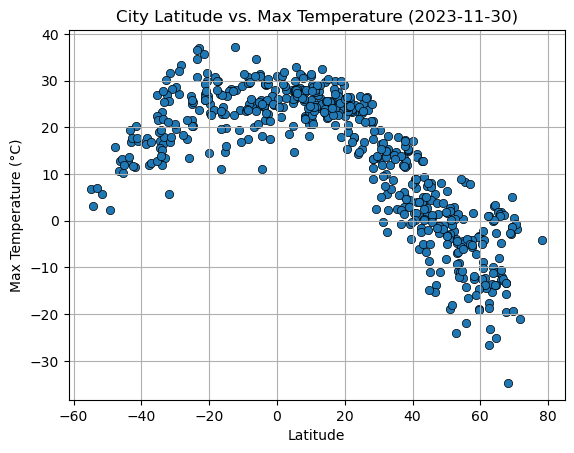

In [14]:
# Extracting latitude and temperature data
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']

# Building the scatter plot
plt.scatter(latitudes, temperatures,edgecolors='black', linewidth=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.strptime(city_data_df['Date'].max(), '%Y-%m-%d %H:%M:%S').date()})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

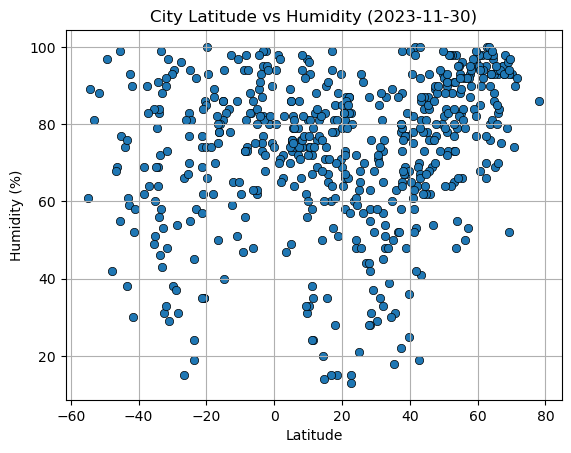

In [15]:
# Extract latitude and humidity data from city_data_df
latitudes = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Build the scatter plot for latitude vs. humidity
plt.scatter(latitudes, humidity, edgecolors='black', linewidth=0.5)  # Adding borders to the points

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.strptime(city_data_df['Date'].max(), '%Y-%m-%d %H:%M:%S').date()})")  # Add a title
plt.xlabel('Latitude')  # Label the x-axis
plt.ylabel('Humidity (%)')  # Label the y-axis
plt.grid(True)  # Add a grid

# Save the figure
plt.savefig("../output_data/Fig2.png")  # Ensure the directory 'output_data' exists

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

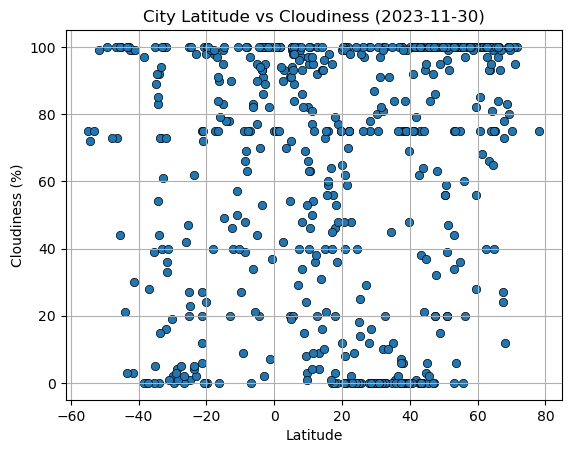

In [16]:
# Extract latitude and cloudiness data from city_data_df
latitudes = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(latitudes, cloudiness, edgecolors='black', linewidth=0.5)  # Adding borders to the points

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.strptime(city_data_df['Date'].max(), '%Y-%m-%d %H:%M:%S').date()})")  # Add a title
plt.xlabel('Latitude')  # Label the x-axis
plt.ylabel('Cloudiness (%)')  # Label the y-axis
plt.grid(True)  # Add a grid

# Save the figure
plt.savefig("../output_data/Fig3.png")  # Ensure the directory 'output_data' exists

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

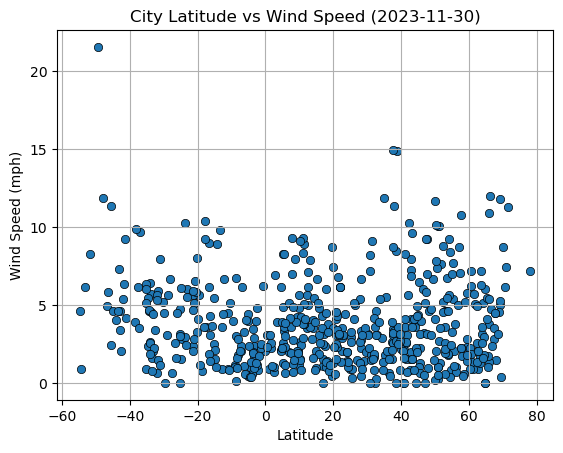

In [17]:
# Extract latitude and wind speed data from city_data_df
latitudes = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Build the scatter plot for latitude vs. wind speed
plt.scatter(latitudes, wind_speed, edgecolors='black', linewidth=0.5)  # Adding borders to the points

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.strptime(city_data_df['Date'].max(), '%Y-%m-%d %H:%M:%S').date()})")  # Add a title
plt.xlabel('Latitude')  # Label the x-axis
plt.ylabel('Wind Speed (mph)')  # Label the y-axis
plt.grid(True)  # Add a grid

# Save the figure
plt.savefig("../output_data/Fig4.png")  # Ensure the directory 'output_data' exists

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
def create_linear_regression_plot(x_data, y_data, title, x_label, y_label, file_name):
    """
    Creates a scatter plot with a linear regression line.

    Parameters:
    x_data (iterable): Data for the x-axis.
    y_data (iterable): Data for the y-axis.
    title (str): Title of the plot.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    file_name (str): File name to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    print(f"The r-value is: {r_value}")
    # Calculate regression values
    reg_values = x_data * slope + intercept

    # Create scatter plot
    plt.scatter(x_data, y_data)

    # Add regression line to plot
    plt.plot(x_data, reg_values, "r-")

    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Annotate the line equation on the plot
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.min()), fontsize=15, color="red")

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()


In [19]:
# Create DataFrame for Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display the first few rows of the DataFrame
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,copainala,17.0833,-93.2000,20.43,99,95,1.09,MX,2023-11-30 03:29:49
3,yellowknife,62.4560,-114.3525,-17.55,95,40,2.57,CA,2023-11-30 03:26:25
6,badger,64.8000,-147.5333,-11.07,88,40,0.00,US,2023-11-30 03:29:51
8,stanley,54.8680,-1.6985,0.29,93,75,2.06,GB,2023-11-30 03:29:51
10,ribeira grande,38.5167,-28.7000,14.87,69,84,8.49,PT,2023-11-30 03:29:52


In [20]:
# Create DataFrame for Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display the first few rows of the DataFrame
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.20,97,100,21.56,TF,2023-11-30 03:29:50
2,waitangi,-43.9535,-176.5597,12.68,74,21,4.02,NZ,2023-11-30 03:29:50
4,blackmans bay,-43.0167,147.3167,16.96,61,100,4.63,AU,2023-11-30 03:29:50
5,adamstown,-25.0660,-130.1015,21.57,77,100,4.75,PN,2023-11-30 03:29:50
7,grytviken,-54.2811,-36.5092,3.24,89,72,0.92,GS,2023-11-30 03:29:51


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8976430247254066


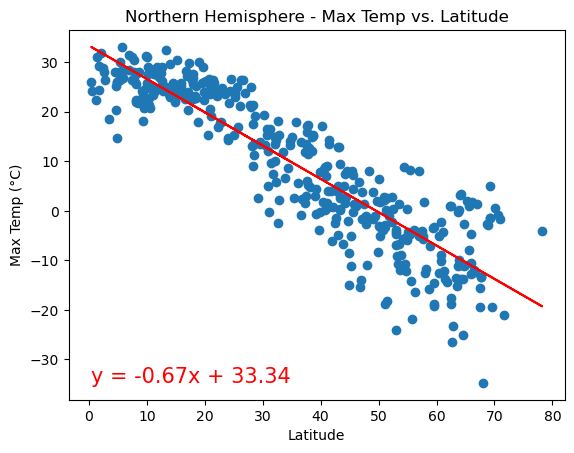

In [21]:
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']

# Create a linear regression plot
create_linear_regression_plot(x_data, y_data, 
                              'Northern Hemisphere - Max Temp vs. Latitude', 
                              'Latitude', 'Max Temp (°C)', 
                              '../output_data/northern_lat_vs_temp.png')


The r-value is: 0.5784730812601975


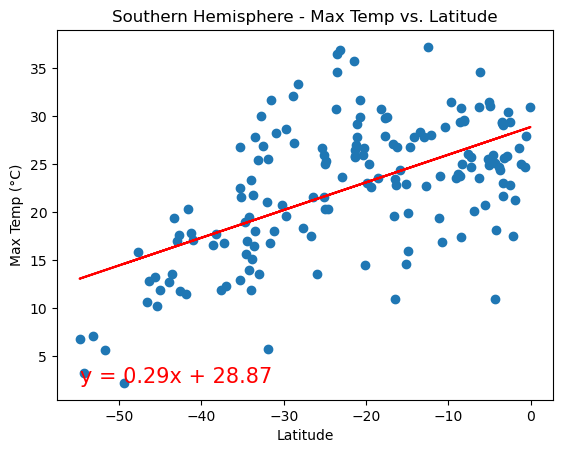

In [22]:
# Assuming 'Max Temp' is a column in southern_hemi_df representing maximum temperature
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']

# Create a linear regression plot
create_linear_regression_plot(x_data, y_data, 
                              'Southern Hemisphere - Max Temp vs. Latitude', 
                              'Latitude', 'Max Temp (°C)', 
                              '../output_data/southern_lat_vs_temp.png')


**Discussion about the linear relationship:** The lower absolute(latitude) value is, the higher Max Temp is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3270922090485771


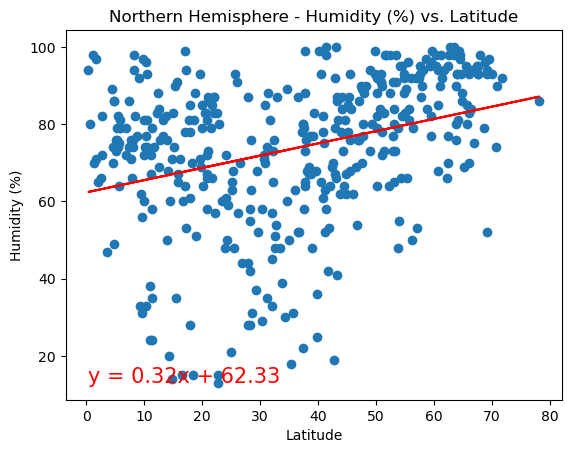

In [23]:
# Assuming 'Humidity' is a column in northern_hemi_df representing humidity percentage
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']

# Create a linear regression plot for Humidity vs. Latitude in the Northern Hemisphere
create_linear_regression_plot(x_data, y_data, 
                              'Northern Hemisphere - Humidity (%) vs. Latitude', 
                              'Latitude', 'Humidity (%)', 
                              '../output_data/northern_lat_vs_humidity.png')


The r-value is: 0.23349629004587574


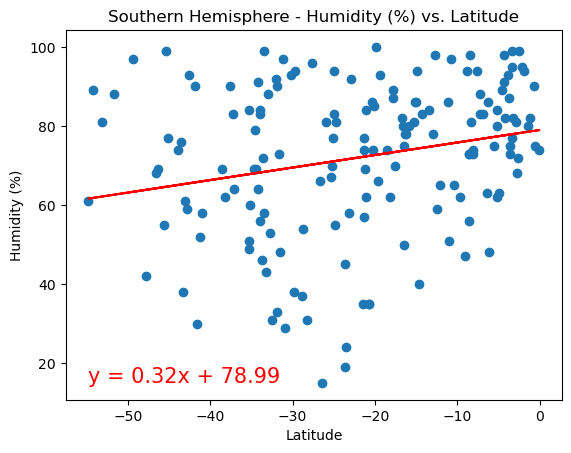

In [24]:
# Assuming 'Humidity' is a column in southern_hemi_df representing humidity percentage
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']

# Create a linear regression plot for Humidity vs. Latitude in the Southern Hemisphere
create_linear_regression_plot(x_data, y_data, 
                              'Southern Hemisphere - Humidity (%) vs. Latitude', 
                              'Latitude', 'Humidity (%)', 
                              '../output_data/southern_lat_vs_humidity.png')


**Discussion about the linear relationship:** There is not a clear relationship between Humidity (%) vs. Latitude, but
1. More people live in Northern Hemisphere.
2. The highter latitude in Northern Hemisphere, the more humid.
3. In Southern Hemisphere, people are almost evenly distributed between in 0 to -60 latitude degree.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20741546637760575


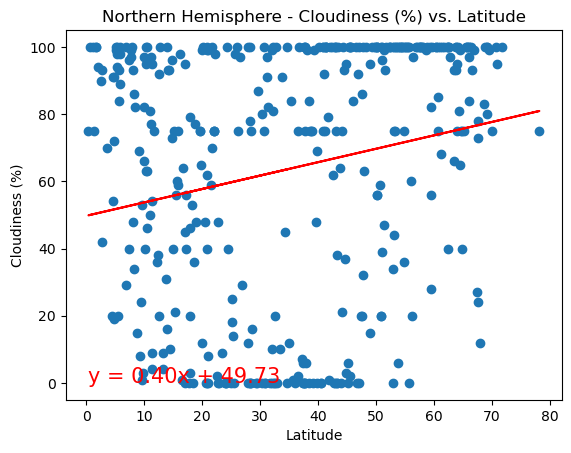

In [25]:
# Assuming 'Cloudiness' is a column in northern_hemi_df representing cloudiness percentage
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']

# Create a linear regression plot for Cloudiness vs. Latitude in the Northern Hemisphere
create_linear_regression_plot(x_data, y_data, 
                              'Northern Hemisphere - Cloudiness (%) vs. Latitude', 
                              'Latitude', 'Cloudiness (%)', 
                              '../output_data/northern_lat_vs_cloudiness.png')


The r-value is: 0.11493227617901094


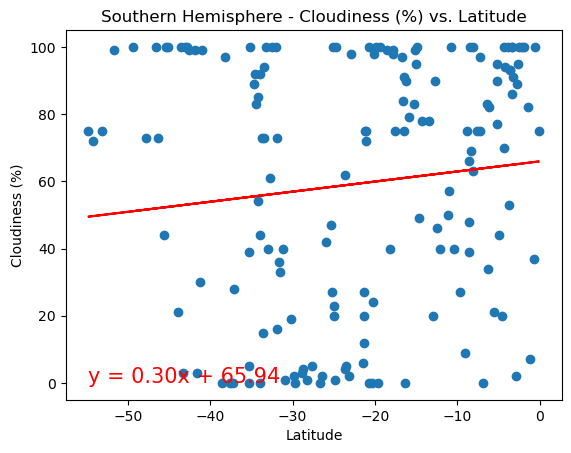

In [26]:
# Assuming 'Cloudiness' is a column in southern_hemi_df representing cloudiness percentage
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']

# Create a linear regression plot for Cloudiness vs. Latitude in the Southern Hemisphere
create_linear_regression_plot(x_data, y_data, 
                              'Southern Hemisphere - Cloudiness (%) vs. Latitude', 
                              'Latitude', 'Cloudiness (%)', 
                              '../output_data/southern_lat_vs_cloudiness.png')


**Discussion about the linear relationship:** No clear relationship between the cloudiness and the latitude, but
1. for both Northern Hemisphere and Southern Hemisphere, it's more like to be 100% cloudiness or 0% rather than in betweeen

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10372908105013466


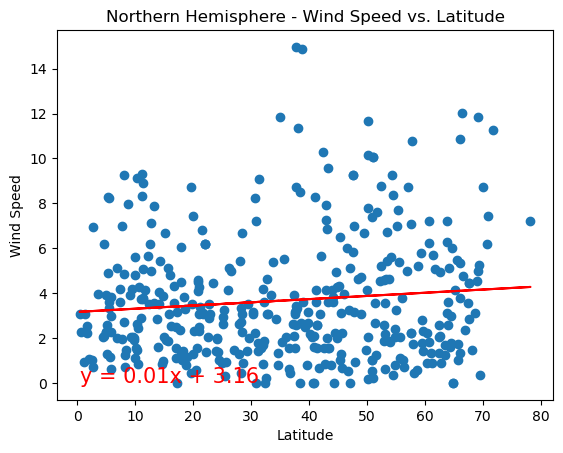

In [27]:
# Assuming 'Wind Speed' is a column in northern_hemi_df representing wind speed in mph or km/h
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']

# Create a linear regression plot for Wind Speed vs. Latitude in the Northern Hemisphere
create_linear_regression_plot(x_data, y_data, 
                              'Northern Hemisphere - Wind Speed vs. Latitude', 
                              'Latitude', 'Wind Speed', 
                              '../output_data/northern_lat_vs_wind_speed.png')


The r-value is: -0.38869434246498585


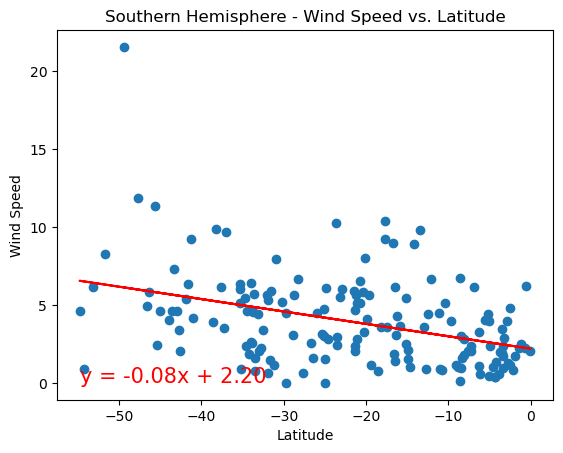

In [28]:
# Assuming 'Wind Speed' is a column in southern_hemi_df representing wind speed in mph or km/h
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']

# Create a linear regression plot for Wind Speed vs. Latitude in the Southern Hemisphere
create_linear_regression_plot(x_data, y_data, 
                              'Southern Hemisphere - Wind Speed vs. Latitude', 
                              'Latitude', 'Wind Speed', 
                              '../output_data/southern_lat_vs_wind_speed.png')


**Discussion about the linear relationship:** No clear relationship between the cloudiness and the latitude, but
1. for both Northern Hemisphere and Southern Hemisphere, the wind speed is more likely to being under 10 miles/hour